# 5 Pytorch Custom Data set

In [2]:
import pandas as pd
import numpy as np
import torch as tc
from torch import nn
# import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 5.1 Getting our datasets and becoming one with Data

In [3]:
import os
def walk_through_dir(dir_path):
  """walks through dir path returning its content"""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [4]:
walk_through_dir(dir_path="DATA")

There are 2 directories and 0 images in DATA
There are 3 directories and 0 images in DATA\test
There are 0 directories and 25 images in DATA\test\pizza
There are 0 directories and 19 images in DATA\test\steak
There are 0 directories and 31 images in DATA\test\sushi
There are 3 directories and 0 images in DATA\train
There are 0 directories and 78 images in DATA\train\pizza
There are 0 directories and 75 images in DATA\train\steak
There are 0 directories and 72 images in DATA\train\sushi


In [5]:
from pathlib import Path
data_path = Path("DATA/")

In [6]:
# setting up our train and test path
train_dir = data_path / "train"
test_dir = data_path / "test"
train_dir,test_dir

(WindowsPath('DATA/train'), WindowsPath('DATA/test'))

### 5.1.1 Visuallising our image

DATA\train\sushi\2797464.jpg
sushi
Random image path: DATA\train\sushi\2797464.jpg
Image class: sushi
Image Height: 512
Image width: 512


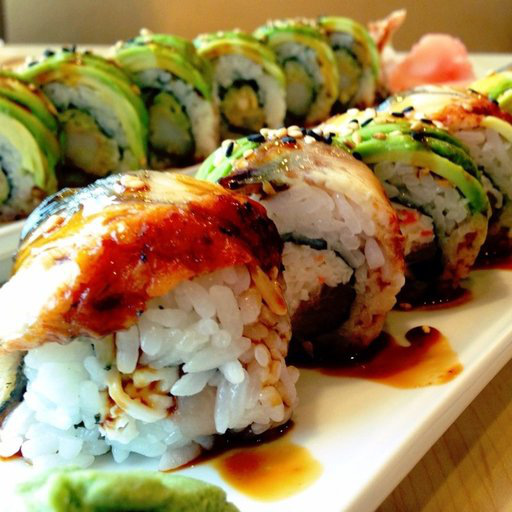

In [7]:
import random
from PIL import Image

# set seed
tc.manual_seed(42)

# 1. get all the image path
image_path_list = list(data_path.glob("*/*/*.jpg"))
# image_path_list

# 2. Plot random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. get the image class
image_class = random_image_path.parent.stem
print(image_class)

# 4. open the image
img = Image.open(random_image_path)

# 5. print meta data
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

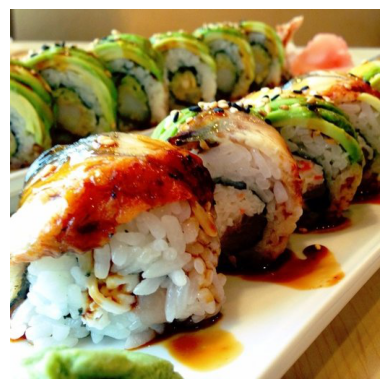

In [8]:
plt.imshow(img)
plt.axis(False)

In [9]:
img_as_array = np.asarray(img)
img_as_array

array([[[ 78,  64,  25],
        [ 92,  78,  39],
        [107,  93,  54],
        ...,
        [135,  99,  39],
        [133,  97,  35],
        [132,  96,  34]],

       [[ 76,  62,  25],
        [ 90,  76,  37],
        [106,  92,  53],
        ...,
        [134,  98,  38],
        [133,  97,  37],
        [132,  96,  34]],

       [[ 74,  60,  23],
        [ 87,  73,  36],
        [104,  90,  53],
        ...,
        [133,  97,  37],
        [132,  96,  36],
        [131,  95,  35]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [206, 164,  80],
        [206, 164,  78],
        [207, 166,  78]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [205, 163,  79],
        [205, 163,  77],
        [204, 164,  76]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [206, 164,  78],
        [204, 164,  76],
        [204, 164,  76]]

## 5.2 Transforming our data

### 5.2.1 Transform data with `torchvision.transform`

In [10]:
data_transform = transforms.Compose([
  # resize the image
  transforms.Resize(size=(64,64)),
  # flip the image
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn image into a torch tensor
  ToTensor()
])

data_transform(img).shape

torch.Size([3, 64, 64])

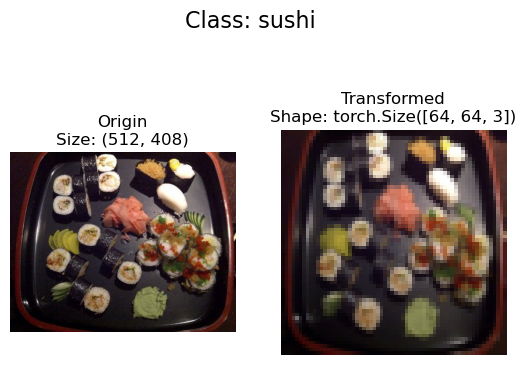

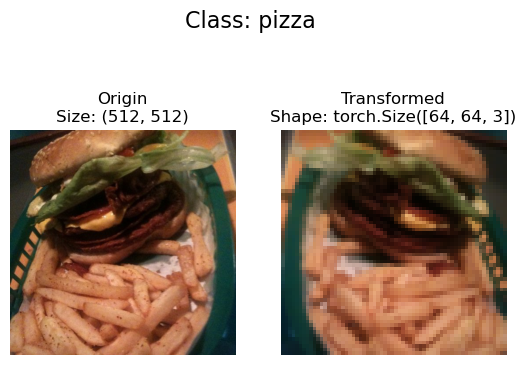

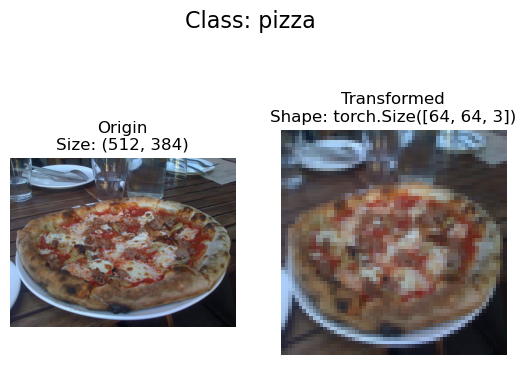

In [11]:
def plot_transformed_images(images_paths,transform,n=3,seed=None):
  """
    Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
    random_image_paths = random.sample(images_paths,k=n)
    for image_path in random_image_paths:
      with Image.open(image_path) as f:
        fig,ax = plt.subplots(nrows=1,ncols=2)
        ax[0].imshow(f)
        ax[0].set_title(f"Origin\nSize: {f.size}")
        ax[0].axis(False)
        
        # transform and plot target image
        transformed_image = transform(f).permute(1,2,0) # not we will need to change the sahpe for the transform
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
        ax[1].axis(False)
        
        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16) 

plot_transformed_images(image_path_list,transform=data_transform,seed=42)

## 5.3 Option1 Loading image data using ImageFolder

In [12]:
# use image folder to create datasets
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform,target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: DATA\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: DATA\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
# getting classnames
train_classnames = train_data.classes
train_classnames

['pizza', 'steak', 'sushi']

In [14]:
# Index on the train data datasets
img,label =  train_data[1][0], train_data[1][1]
# img,label
print(f"Image Tensor:\n{img}") 
print(f"Image Shape:\n{img.dtype}") 
print(f"Image Datatype:\n{img.dtype}")
print(f"Image Label:\n{train_classnames[label]}")

Image Tensor:
tensor([[[0.4902, 0.4902, 0.5059,  ..., 0.8902, 0.8157, 0.7020],
         [0.5020, 0.5098, 0.5098,  ..., 0.9961, 0.9843, 0.9686],
         [0.4431, 0.4667, 0.5176,  ..., 1.0000, 0.9961, 0.9922],
         ...,
         [0.5176, 0.5569, 0.5647,  ..., 0.4627, 0.4745, 0.5137],
         [0.4824, 0.4706, 0.5020,  ..., 0.4706, 0.4824, 0.4863],
         [0.4941, 0.4314, 0.5059,  ..., 0.4980, 0.5137, 0.5098]],

        [[0.2784, 0.2784, 0.2902,  ..., 0.8902, 0.7961, 0.6510],
         [0.2824, 0.2902, 0.2941,  ..., 0.9961, 0.9804, 0.9529],
         [0.2627, 0.2667, 0.2980,  ..., 1.0000, 0.9961, 0.9961],
         ...,
         [0.1804, 0.2549, 0.3176,  ..., 0.1686, 0.1490, 0.1529],
         [0.1098, 0.0980, 0.1216,  ..., 0.1373, 0.1412, 0.1373],
         [0.1529, 0.0824, 0.1333,  ..., 0.1569, 0.1804, 0.1765]],

        [[0.1059, 0.1137, 0.1176,  ..., 0.8706, 0.7137, 0.5490],
         [0.1176, 0.1216, 0.1216,  ..., 0.9882, 0.9608, 0.9176],
         [0.1451, 0.1294, 0.1333,  ..., 0.99

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image Permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

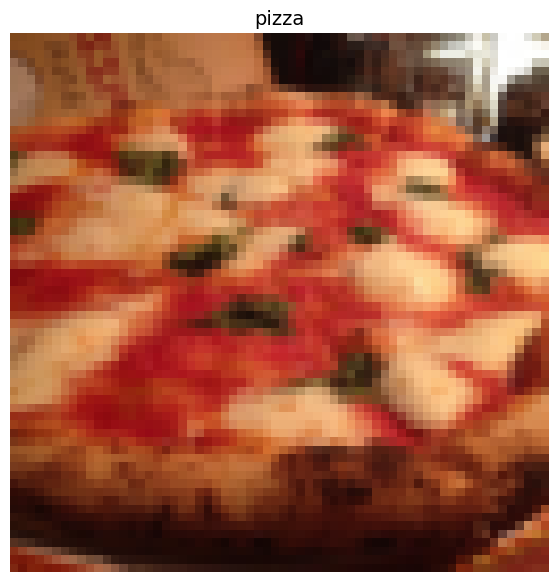

In [15]:
# Rearrange the order of dimension
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image Permute shape: {img_permute.shape} -> [height, width, color_channels]")

# plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(train_classnames[label],fontsize=14)

### 5.3.1 Turn loaded images into Dataloader

In [16]:
import os
os.cpu_count()

4

In [17]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(
    dataset=train_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True
)
test_dataloader = DataLoader(
    dataset=test_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True
)

len(train_dataloader),len(test_dataloader)

(225, 75)

## 5.4 Option2 Loading Image Data with a custom `Dataset`

In [18]:
from typing import Tuple,Dict,List
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.4.1 Creating a helper function to get classnames

In [19]:
# def 
# setup target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: DATA\train


['pizza', 'steak', 'sushi']

In [20]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  
  # 2. raise an error if class names nt found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...please check the file structure")
  
  # 3. create a dictionary of index labels
  classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, classes_to_idx

In [21]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.4.2 Create a custom `Dataset` to replicate `ImageFolder`

In [22]:
from torch.utils.data import Dataset
# 1. subclass
class ImageFolderCustom(Dataset):
  # 2. Inititalise the custom dataset
  def __init__(self,targ_dir:str,transform=None):
    # 3. create class attributes
    # get all the input image paths
    self.paths = list(Path(targ_dir).glob("*/*.jpg"))
    # setup transforms
    self.transform = transform
    # create classes and class_to_idx
    self.classes,self.class_to_idx = find_classes(targ_dir)
    
  # 4. create a function to load images
  def load_image(self,index:int) -> Image.Image:
    """Opens an image file paths and returns it"""
    image_path = self.paths[index]
    return Image.open(image_path)
  
  # 5. overwrite __len__()
  def __len__(self) -> int:
    """Return total number of samples"""
    return len(self.paths)
  
  # 6. overwrite __getitem__
  def __getitem__(self,index:int) -> Tuple[tc.Tensor,int]:
    """Returns one sample of data and label (X,y)"""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name 
    class_idx = self.class_to_idx[class_name]
    
    # Transform if necassary
    
    if self.transform:
      return self.transform(img) ,class_idx
    else:
      return img,class_idx

In [23]:
# 
train_transforms = transforms.Compose([
  transforms.Resize(size=(64,64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Resize(size=(64,64)),
  transforms.ToTensor()
])

In [24]:
# Test out ImageCustomFolder
train_data_custom = ImageFolderCustom(targ_dir=train_dir,transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=train_dir,transform=test_transforms)
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x1ffd9f0d050>,
 <__main__.ImageFolderCustom at 0x1ffda3e7a90>)

In [25]:
# check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.4.3 Create a custom function to display random images

In [26]:
# 1. create a function to take in a dataset
def display_random_images(dataset:tc.utils.data.Dataset,classes:List[str] = None,n:int = 10,display_shape:bool = True,seed:int = None):
  # 2. Adjust display
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
  # 3. set the random seed
  if seed:
    random.seed(seed)
    
  # 4. get rnadom indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)
  
  # 5. setup the plot
  plt.figure(figsize=(16,10))  
  
  # 6. loop through random sample images
  for i,targ_smaple in enumerate(random_samples_idx):
    targ_image,targ_label = dataset[targ_smaple][0],dataset[targ_smaple][1]
    
    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)
    
    # plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    
    if classes:
      title = f"classes: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
        
    plt.title(title)
    

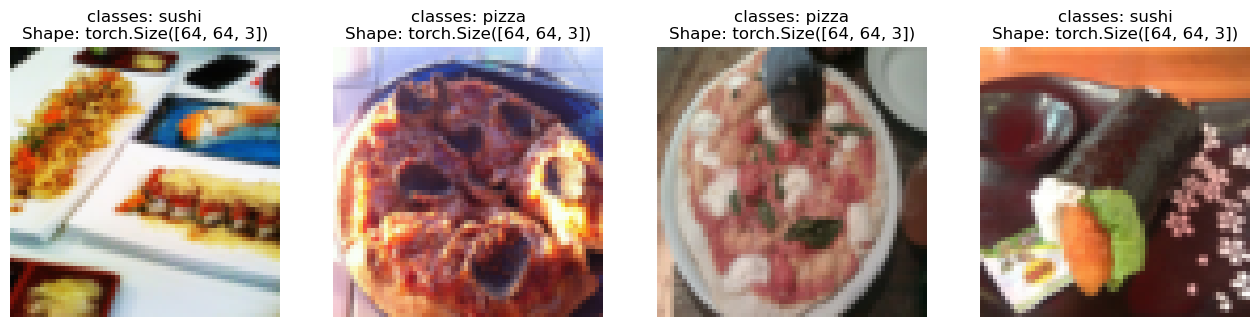

In [27]:
# 
display_random_images(train_data,n=4,classes=train_classnames,seed=42)

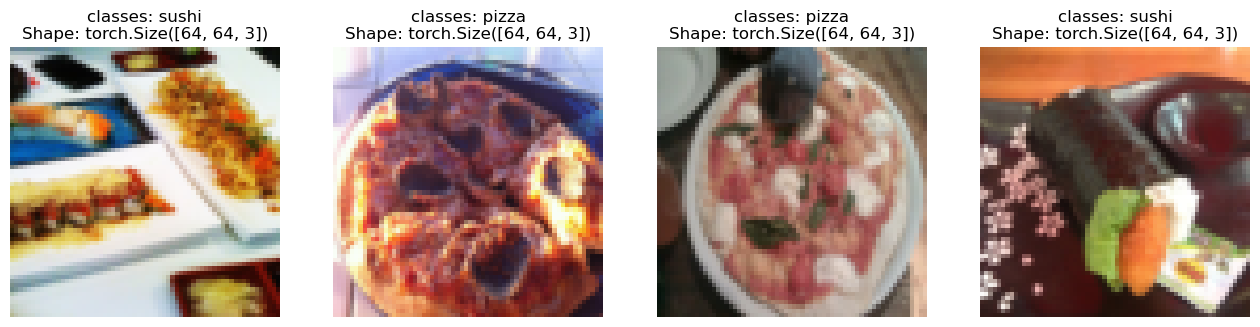

In [28]:
display_random_images(train_data_custom, n=4, classes=train_classnames, seed=42)